Step 1: Loading the dataset...
Dataset loaded successfully.

Step 2: Preprocessing the data...
Data preprocessing complete.

Step 3: Training the Logistic Regression model...


/tmp/ipython-input-3138521311.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-3138521311.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

Model training complete.

Model trained and saved as 'model.pkl'.
The app will use this file for predictions.

Step 5: Evaluating the model and generating a Confusion Matrix...
Model Accuracy: 0.8049
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.34      0.50        35
           1       0.79      0.99      0.88        88

    accuracy                           0.80       123
   macro avg       0.86      0.67      0.69       123
weighted avg       0.83      0.80      0.77       123


Confusion Matrix:
[[12 23]
 [ 1 87]]


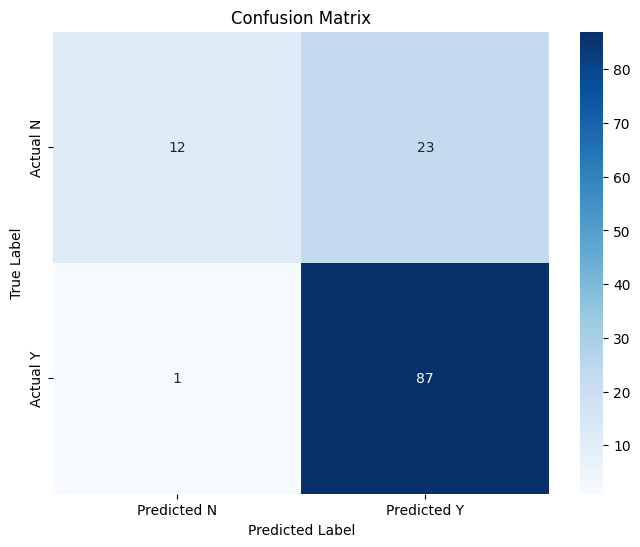


Project complete. The heatmap should be displayed in a separate window.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# --- 1. Load the Dataset ---
print("Step 1: Loading the dataset...")
# Make sure your 'data.csv' file is in the same directory as this script.
df = pd.read_csv('data.csv')
print("Dataset loaded successfully.")

# --- 2. Data Preprocessing and Feature Engineering ---
print("\nStep 2: Preprocessing the data...")

# Combine Applicant and Coapplicant incomes to create a new feature 'Total_Income'.
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# Drop the original income columns and the Loan_ID as they are no longer needed for the model.
df = df.drop(['ApplicantIncome', 'CoapplicantIncome', 'Loan_ID'], axis=1)

# Handle missing values
# Fill missing numerical values with the mean of their respective columns.
for col in ['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Total_Income']:
    df[col].fillna(df[col].mean(), inplace=True)

# Fill missing categorical values with the mode (most frequent value) of their columns.
for col in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Clean the 'Dependents' column: replace '3+' with '3' and convert it to a float.
df['Dependents'] = df['Dependents'].str.replace('3+', '3', regex=False).astype(float)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

# Remove rows where the target variable 'Loan_Status' is missing.
df.dropna(subset=['Loan_Status'], inplace=True)

# Convert the target variable ('Loan_Status') from 'Y'/'N' to a numeric format (1/0).
le = LabelEncoder()
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

# Use one-hot encoding to convert categorical features into a numeric format
# that the machine learning model can understand.
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)
print("Data preprocessing complete.")

# --- 3. Model Training ---
print("\nStep 3: Training the Logistic Regression model...")

# Separate the dataset into features (X) and the target variable (y).
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Split the data into a training set (80%) and a testing set (20%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model.
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print("Model training complete.")

# --- 4. Model Saving ---
# We now save the trained model to a file for the app to use.
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)
print("\nModel trained and saved as 'model.pkl'.")
print("The app will use this file for predictions.")

# --- 5. Model Evaluation with Confusion Matrix and Heatmap ---
print("\nStep 5: Evaluating the model and generating a Confusion Matrix...")

# Use the trained model to make predictions on the test set.
y_pred = model.predict(X_test)

# Print the accuracy score and a detailed classification report.
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Create a heatmap visualization of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted N', 'Predicted Y'], yticklabels=['Actual N', 'Actual Y'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("\nProject complete. The heatmap should be displayed in a separate window.")